In [135]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score,precision_score,confusion_matrix,classification_report,accuracy_score
from sklearn import tree
from sklearn.metrics import roc_auc_score



In [136]:
loan_data=pd.read_csv("loan_data.csv")

In [137]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [138]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [139]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [140]:
loan_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [141]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [142]:
loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [143]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [144]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [145]:
loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [146]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [147]:
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [148]:
loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [149]:
fig = px.bar(data_frame=loan_data, x=loan_data['Gender'].value_counts().index, y=loan_data['Gender'].value_counts().values,text_auto=True)
fig.update_layout(title='Number of Males and Females',xaxis_title='Gender',yaxis_title='Count',width=500,height=500)
fig.show()

In [150]:
fig = px.bar(data_frame=loan_data, x=loan_data['Married'].value_counts().index, y=loan_data['Married'].value_counts().values,text_auto=True)
fig.update_layout(title='Number of Married and Unmarried',xaxis_title='Marital status',yaxis_title='Count',width=500,height=500)
fig.show()

In [151]:
fig = px.bar(data_frame=loan_data, x=loan_data['Self_Employed'].value_counts().index, y=loan_data['Self_Employed'].value_counts().values,text_auto=True)
fig.update_layout(title='Number of Self_Employed or Not',xaxis_title='Employed',yaxis_title='Count',width=500,height=500)
fig.show()

In [152]:
fig = px.bar(data_frame=loan_data, x=loan_data['Credit_History'].value_counts().index, y=loan_data['Credit_History'].value_counts().values,text_auto=True)
fig.update_layout(title='Number of Credit_History',xaxis_title='Credit_History',yaxis_title='Count',width=500,height=500)
fig.show()

In [153]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [154]:
fig = px.bar(data_frame=loan_data, x=loan_data['Dependents'].value_counts().index, y=loan_data['Dependents'].value_counts().values,text_auto=True)
fig.update_layout(title='Number of Dependents',xaxis_title='Dependents',yaxis_title='Count',width=500,height=500)
fig.show()

In [155]:
fig = px.bar(data_frame=loan_data, x=loan_data['Education'].value_counts().index, y=loan_data['Education'].value_counts().values,text_auto=True)
fig.update_layout(title='Number of Graduate and Not Graduate',xaxis_title='Graduation',yaxis_title='Count',width=500,height=500)
fig.show()

In [156]:
fig = px.bar(data_frame=loan_data, x=loan_data['Property_Area'].value_counts().index, y=loan_data['Property_Area'].value_counts().values,text_auto=True)
fig.update_layout(title='Number of Property Areas',xaxis_title='Property Areas',yaxis_title='Count',width=500,height=500)
fig.show()

In [157]:
fig=px.histogram(data_frame=loan_data,x='ApplicantIncome',text_auto=True,nbins=20)
fig.update_layout(width=900,height=500)
fig.show()

In [158]:
fig=px.box(data_frame=loan_data,x='ApplicantIncome')
fig.update_layout(width=800,height=500)
fig.show()

In [159]:
fig=px.box(data_frame=loan_data,x='ApplicantIncome',y='Education',orientation='h', color='Education')
fig.update_layout(title='Applicant Income',width=800,height=500)
fig.show()

In [160]:
fig=px.histogram(data_frame=loan_data,x='CoapplicantIncome',text_auto=True,nbins=20)
fig.update_layout(title='Coapplicant Income',width=800,height=500)
fig.show()

In [161]:
fig=px.box(data_frame=loan_data,x='CoapplicantIncome')
fig.update_layout(width=800,height=400)
fig.show()

In [162]:
fig=px.histogram(data_frame=loan_data,x='LoanAmount',text_auto=True,nbins=20)
fig.update_layout(title='Loan Amount',width=800,height=500)
fig.show()

In [163]:
fig=px.box(data_frame=loan_data,x='LoanAmount',orientation='h', )
fig.update_layout(title='Loan Amount',width=800,height=500)
fig.show()

In [164]:
fig=px.box(data_frame=loan_data,x='LoanAmount',y='Gender',orientation='h', color='Education')
fig.update_layout(title='Loan Amount',width=800,height=500)
fig.show()

In [165]:
Gender_vise_Loan_Status= loan_data.groupby(['Gender', 'Loan_Status']).size().reset_index(name='Count')
Gender_vise_Loan_Status

,Gender,Loan_Status,Count
0,Female,N,37
1,Female,Y,75
2,Male,N,150
3,Male,Y,339


In [166]:
Married_vise_Loan_Status= loan_data.groupby(['Married', 'Loan_Status']).size().reset_index(name='Count')
Married_vise_Loan_Status

,Married,Loan_Status,Count
0,No,N,79
1,No,Y,134
2,Yes,N,113
3,Yes,Y,285


In [167]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [168]:
Dependents_vise_Loan_Status= loan_data.groupby(['Dependents', 'Loan_Status']).size().reset_index(name='Count')
Dependents_vise_Loan_Status

,Dependents,Loan_Status,Count
0,0,N,107
1,0,Y,238
2,1,N,36
3,1,Y,66
4,2,N,25
5,2,Y,76
6,3+,N,18
7,3+,Y,33


In [169]:
Education_vise_Loan_Status= loan_data.groupby(['Education', 'Loan_Status']).size().reset_index(name='Count')
Education_vise_Loan_Status

,Education,Loan_Status,Count
0,Graduate,N,140
1,Graduate,Y,340
2,Not Graduate,N,52
3,Not Graduate,Y,82


In [170]:
Self_Employed_vise_Loan_Status= loan_data.groupby(['Self_Employed', 'Loan_Status']).size().reset_index(name='Count')
Self_Employed_vise_Loan_Status

,Self_Employed,Loan_Status,Count
0,No,N,157
1,No,Y,343
2,Yes,N,26
3,Yes,Y,56


In [171]:
Credit_History_vise_Loan_Status= loan_data.groupby(['Credit_History', 'Loan_Status']).size().reset_index(name='Count')
Credit_History_vise_Loan_Status

,Credit_History,Loan_Status,Count
0,0.0,N,82
1,0.0,Y,7
2,1.0,N,97
3,1.0,Y,378


In [172]:
Property_Area_vise_Loan_Status= loan_data.groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='Count')
Property_Area_vise_Loan_Status

,Property_Area,Loan_Status,Count
0,Rural,N,69
1,Rural,Y,110
2,Semiurban,N,54
3,Semiurban,Y,179
4,Urban,N,69
5,Urban,Y,133


In [173]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Income_Group']=pd.cut(loan_data['ApplicantIncome'],bins=bins,labels=group,include_lowest=True)
Income_Group_vise_Loan_Status= loan_data.groupby(['Income_Group', 'Loan_Status']).size().reset_index(name='Count')
Income_Group_vise_Loan_Status


,Income_Group,Loan_Status,Count
0,Low,N,34
1,Low,Y,74
2,Average,N,67
3,Average,Y,159
4,High,N,45
5,High,Y,98
6,Very high,N,46
7,Very high,Y,91


In [174]:
fig = px.bar(Income_Group_vise_Loan_Status,x='Income_Group',y='Count',color='Loan_Status',barmode='group',text_auto=True )
fig.update_layout(xaxis_title='Income Group',yaxis_title='Count',width=800,height=500)
fig.show()






In [175]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_data['CoapplicantIncome_Group']=pd.cut(loan_data['CoapplicantIncome'],bins=bins,labels=group,include_lowest=True)
CoapplicantIncome_Group_vise_Loan_Status= loan_data.groupby(['CoapplicantIncome_Group', 'Loan_Status']).size().reset_index(name='Count')
CoapplicantIncome_Group_vise_Loan_Status


,CoapplicantIncome_Group,Loan_Status,Count
0,Low,N,99
1,Low,Y,196
2,Average,N,61
3,Average,Y,161
4,High,N,32
5,High,Y,65


In [176]:
fig = px.bar(CoapplicantIncome_Group_vise_Loan_Status,x='CoapplicantIncome_Group',y='Count',color='Loan_Status',barmode='group',text_auto=True )
fig.update_layout(xaxis_title='CoapplicantIncome_Group',yaxis_title='Count',width=800,height=500)
fig.show()


In [177]:
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_data['Total_Income_Group']=pd.cut(loan_data['Total_Income'],bins=bins,labels=group,include_lowest=True)
Total_Income_Group_vise_Loan_Status= loan_data.groupby(['Total_Income_Group', 'Loan_Status']).size().reset_index(name='Count')
Total_Income_Group_vise_Loan_Status

,Total_Income_Group,Loan_Status,Count
0,Low,N,14
1,Low,Y,10
2,Average,N,32
3,Average,Y,87
4,High,N,65
5,High,Y,159
6,Very high,N,81
7,Very high,Y,166


In [178]:
fig = px.bar(Total_Income_Group_vise_Loan_Status,x='Total_Income_Group',y='Count',color='Loan_Status',barmode='group',text_auto=True )
fig.update_layout(xaxis_title='Income_Group',yaxis_title='Count',width=800,height=500)
fig.show()


In [179]:
bins=[0,100,200,700]
group=['Low','Average','High']
loan_data['LoanAmount_group']=pd.cut(loan_data['LoanAmount'],bins,labels=group)
LoanAmount_group_vise_Loan_Status= loan_data.groupby(['LoanAmount_group', 'Loan_Status']).size().reset_index(name='Count')
LoanAmount_group_vise_Loan_Status


,LoanAmount_group,Loan_Status,Count
0,Low,N,47
1,Low,Y,107
2,Average,N,103
3,Average,Y,255
4,High,N,31
5,High,Y,49


In [180]:
fig = px.bar(LoanAmount_group_vise_Loan_Status,x='LoanAmount_group',y='Count',color='Loan_Status',barmode='group',text_auto=True )
fig.update_layout(xaxis_title='LoanAmount_group',yaxis_title='Count',width=800,height=500)
fig.show()

In [181]:
loan_data=loan_data.drop(['Income_Group', 'CoapplicantIncome_Group',  'Total_Income_Group','LoanAmount_group', 'Total_Income'], axis=1)

In [182]:
loan_data['Dependents'].replace('3+', 3,inplace=True)
loan_data['Loan_Status'].replace('N', 0,inplace=True) 
loan_data['Loan_Status'].replace('Y', 1,inplace=True)

In [183]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [184]:
Correlation=loan_data.corr(method='pearson')
print(Correlation)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000  


C:\Users\Suyash\AppData\Local\Temp\ipykernel_25672\4188836588.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [185]:
fig=go.Figure(go.Heatmap(x=Correlation.columns,y=Correlation.columns,z=Correlation.values.tolist(),colorscale='rdylgn',zmin=-1,zmax=1))
fig.update_layout(title='Correlation Heatmap',xaxis_title='Variables',yaxis_title='Variables')
fig.show()

In [186]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [187]:
loan_data['Gender'].fillna(method='ffill', inplace=True)

In [188]:
loan_data['Dependents'].fillna( loan_data['Dependents'].mode()[0], inplace=True)


In [189]:
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)

In [190]:
loan_data['Self_Employed'].fillna(method='ffill', inplace=True)

In [191]:
loan_data['Credit_History'].fillna(method='bfill', inplace=True)

In [192]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

In [193]:
loan_data['Loan_Amount_Term'].fillna( loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [194]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [195]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.84202,0.687296
std,6109.041673,2926.248369,84.107233,64.428629,0.36502,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000,1.000000


In [196]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [197]:
loan_data['NormLoanAmount']=np.log(loan_data['LoanAmount'])

In [198]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,NormLoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


In [199]:
loan_data=loan_data.drop('Loan_ID',axis=1) 

In [200]:
X = loan_data.drop(labels='Loan_Status',axis=1)
Y = loan_data['Loan_Status']

In [201]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,NormLoanAmount
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


In [202]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [203]:
columns = X.columns

cat_col= [col for col in X.columns if X[col].dtypes=='O']
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [204]:
dummy = pd.get_dummies(X[cat_col])
dummy.shape

(614, 15)

In [205]:
dummy

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
610,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
611,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
612,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


In [206]:
final = pd.concat([X,dummy],axis=1)
final.shape

(614, 27)

In [207]:
final.drop(cat_col,inplace=True,axis=1)


In [208]:
final.shape

(614, 21)

In [209]:
final

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,NormLoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [210]:
X=final
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,NormLoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [211]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [212]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

# LogisticRegression

In [213]:
clf = LogisticRegression()

In [214]:
x_train.shape,x_test.shape

((491, 21), (123, 21))

In [215]:
clf.fit(x_train,y_train)

D:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [216]:
pred = clf.predict(x_test)

In [217]:
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [218]:
accuracy_score(y_test,pred)

0.7560975609756098

In [219]:
f1_score(y_test,pred)

0.8295454545454545

In [220]:
precision_score(y_test,pred)

0.73

In [221]:
recall_score(y_test,pred)

0.9605263157894737

In [222]:
confusion_matrix(y_test,pred)

array([[20, 27],
       [ 3, 73]], dtype=int64)

In [223]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [224]:
fpr, tpr, thresholds = roc_curve(y_test,pred)

In [225]:
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.6930291153415453


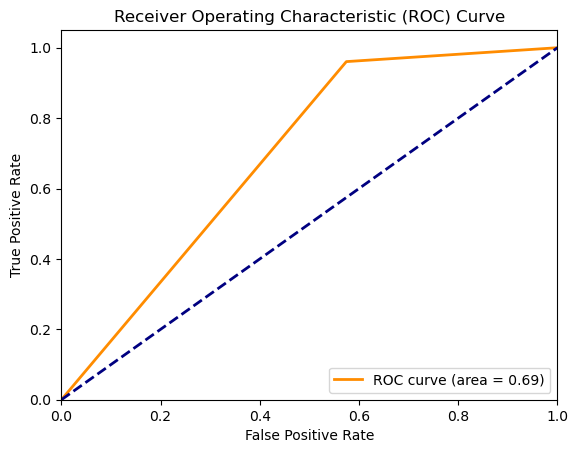

In [226]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Dicision_Tree

In [227]:
dct=tree.DecisionTreeClassifier()

In [228]:
dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [229]:
pred = dct.predict(x_test)

In [230]:
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [231]:
accuracy_score(y_test,pred)

0.6422764227642277

In [232]:
f1_score(y_test,pred)

0.725

In [233]:
precision_score(y_test,pred)

0.6904761904761905

In [234]:
recall_score(y_test,pred)

0.7631578947368421

In [235]:
confusion_matrix(y_test,pred)

array([[21, 26],
       [18, 58]], dtype=int64)

In [236]:
roc_auc_score(y_test,pred)

0.6049832026875699

In [237]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

ROC AUC: 0.6049832026875699


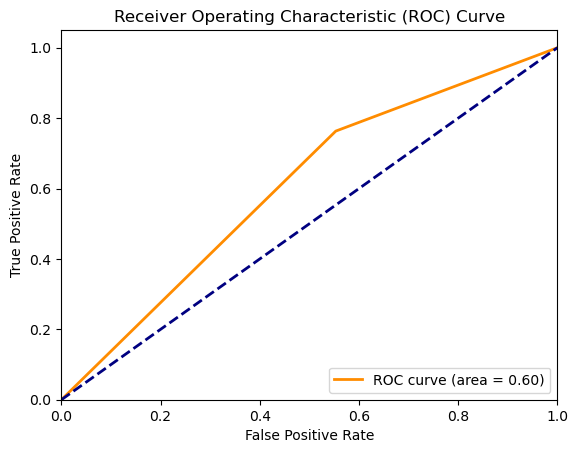

In [238]:
fpr, tpr, thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [239]:
 rfc=RandomForestClassifier()

In [240]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [241]:
pred=rfc.predict(x_test)

In [242]:
accuracy_score(y_test,pred)

0.7398373983739838

In [243]:
precision_score(y_test,pred)

0.72

In [244]:
recall_score(y_test,pred)

0.9473684210526315

In [245]:
f1_score(y_test,pred)

0.8181818181818181

In [246]:
confusion_matrix(y_test,pred)

array([[19, 28],
       [ 4, 72]], dtype=int64)

ROC AUC: 0.6758118701007838


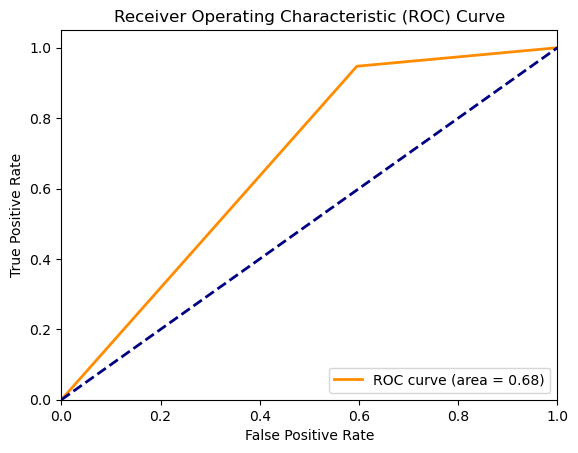

In [247]:
fpr, tpr, thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()